# Practica ecofuturo - Caso Titnanic 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# importar el dataframe 
df = pd.read_excel("titanic data.xlsx")

In [3]:
#EDA
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of      Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   
..          ...       ...     ...     ...   ...    ...    ...      ...   
886         886         0       2    male  27.0      0      0  13.0000   
887         887         1       1  female  19.0      0      0  30.0000   
888         888         0       3  female   NaN      1      2  23.4500   
889         889         1       1    male  26.0      0      0  30.0000   
890         890         0       3    male  32.0      0      0   7.7500   

    embarked   class    who  adult_male deck  embark_town alive  alone  
0     

In [5]:
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head(1)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [7]:
df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

## Parte grafica 

In [10]:
df1 = df.copy()
conteo = df1['class'].value_counts()
print(conteo)

class
Third     491
First     216
Second    184
Name: count, dtype: int64


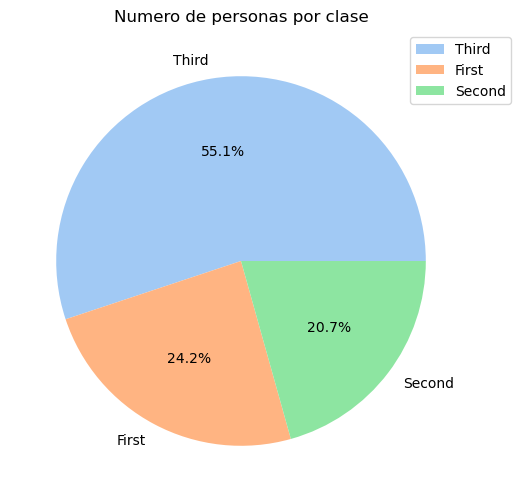

In [15]:
# Pie 
plt.rcParams['figure.figsize'] = (12,6)
plt.pie(conteo,
        labels = conteo.index,
        colors= sns.color_palette('pastel'),
        autopct='%1.1f%%')
plt.title('Numero de personas por clase')
plt.legend(loc='upper right', bbox_to_anchor=(1.1,1))
plt.show()

In [47]:
# GRAFICO DE BARERAS POR GENERO 
df2 = df1.copy()
genero = df2['sex'].value_counts()
#gen = df2.groupby('sex')['age'].mean()
print(genero)


sex
male      577
female    314
Name: count, dtype: int64
sex
female    27.915709
male      30.726645
Name: age, dtype: float64


C:\Users\andyg\AppData\Local\Temp\ipykernel_48492\3374171002.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc ='upper right', bbox_to_anchor=(1.1,1))


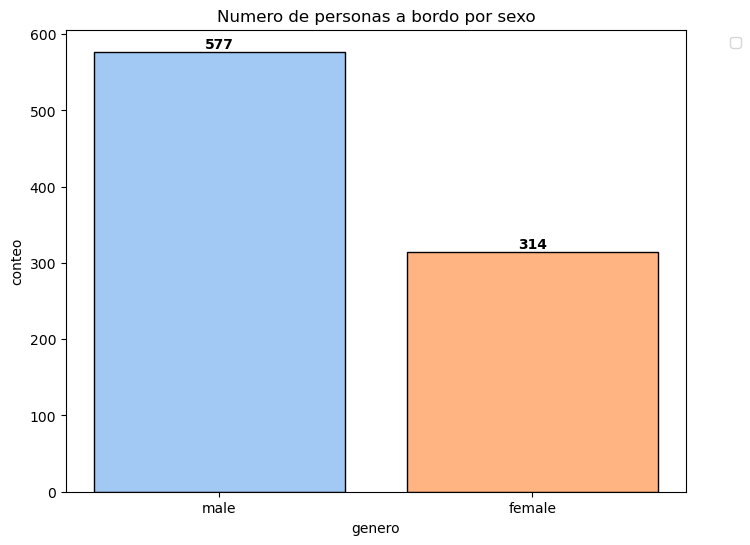

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
plt.bar(genero.index, genero.values, 
        color=sns.color_palette('pastel'), 
        edgecolor='black')
for i, v in enumerate(genero.values):
    plt.text(i, v + 5, str(v), ha='center', color='black', fontweight='bold')

plt.title('Numero de personas a bordo por sexo')
plt.xlabel('genero')
plt.ylabel('conteo')
plt.legend(loc ='upper right', bbox_to_anchor=(1.1,1))
plt.show()


class     First  Second  Third
survived                      
0            80      97    372
1           136      87    119


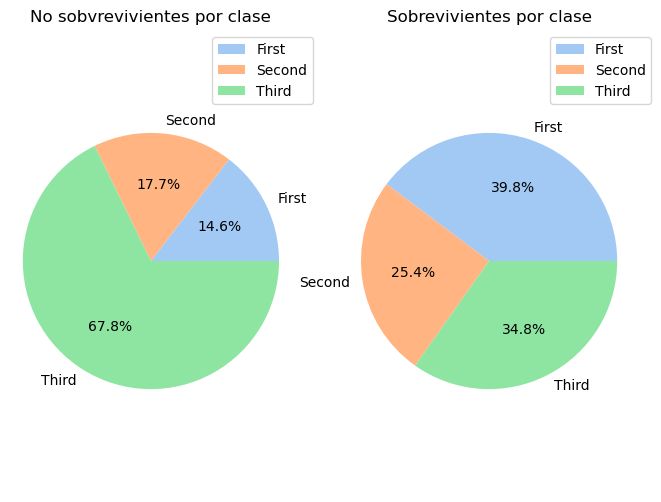

In [71]:
sobre = df2.groupby(['survived','class']).size().unstack()
print(sobre)

# Pie chart doble 
plt.subplot(1,2,1)
plt.pie(sobre.loc[0], labels=sobre.columns,
        autopct='%1.1f%%',colors= sns.color_palette('pastel'))
plt.title('No sobvrevivientes por clase')
plt.legend(loc='upper right', bbox_to_anchor = (1.1,1))
plt.axis('equal')


plt.subplot(1,2,2)
plt.pie(sobre.loc[1],labels=sobre.columns,
        autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Sobrevivientes por clase')
plt.legend(loc='upper right', bbox_to_anchor = (1.1,1))
plt.axis('equal')



plt.show()


In [76]:
# GRAFICO DE TRES 
df3 = df1.copy()
whos = df3.groupby(['who','survived']).size().unstack()
print(whos)

survived    0    1
who               
child      34   49
man       449   88
woman      66  205


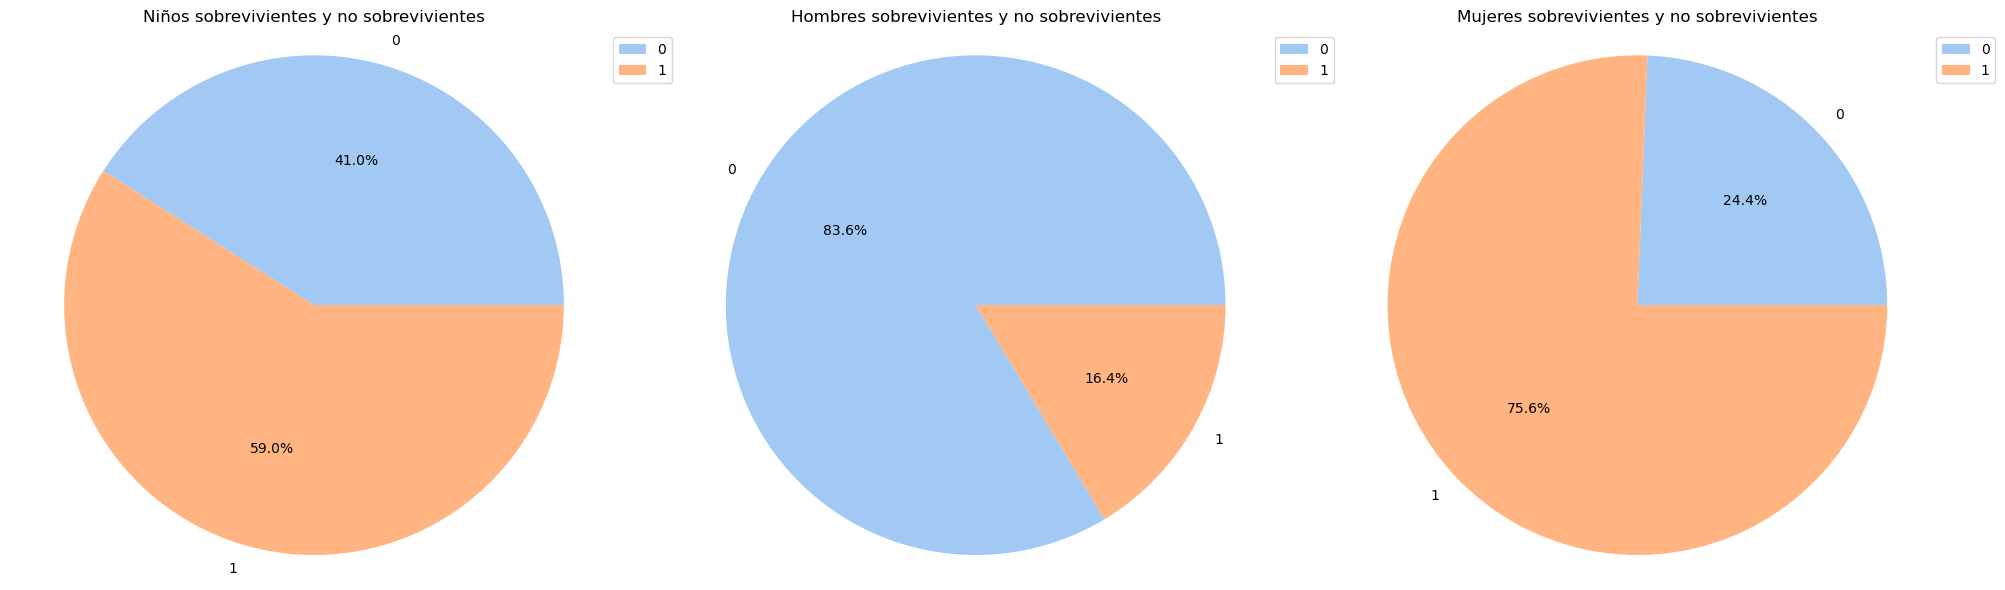

In [119]:
plt.rcParams['figure.figsize']=(20,6)
plt.subplot(1,3,1)
plt.pie(whos.loc['child'],
        labels=whos.columns,
        colors=sns.color_palette('pastel'),
        autopct='%1.1f%%')
plt.title('Niños sobrevivientes y no sobrevivientes')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.axis('equal')


plt.subplot(1,3,2)
plt.pie(whos.loc['man'],
        labels=whos.columns,
        colors=sns.color_palette('pastel'),
        autopct='%1.1f%%')
plt.title('Hombres sobrevivientes y no sobrevivientes')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.axis('equal')


plt.subplot(1,3,3)
plt.pie(whos.loc['woman'],
        labels=whos.columns,
        colors=sns.color_palette('pastel'),
        autopct='%1.1f%%')
plt.title('Mujeres sobrevivientes y no sobrevivientes')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.axis('equal')

plt.tight_layout()
plt.show()


who       child  man  woman
survived                   
0            34  449     66
1            49   88    205


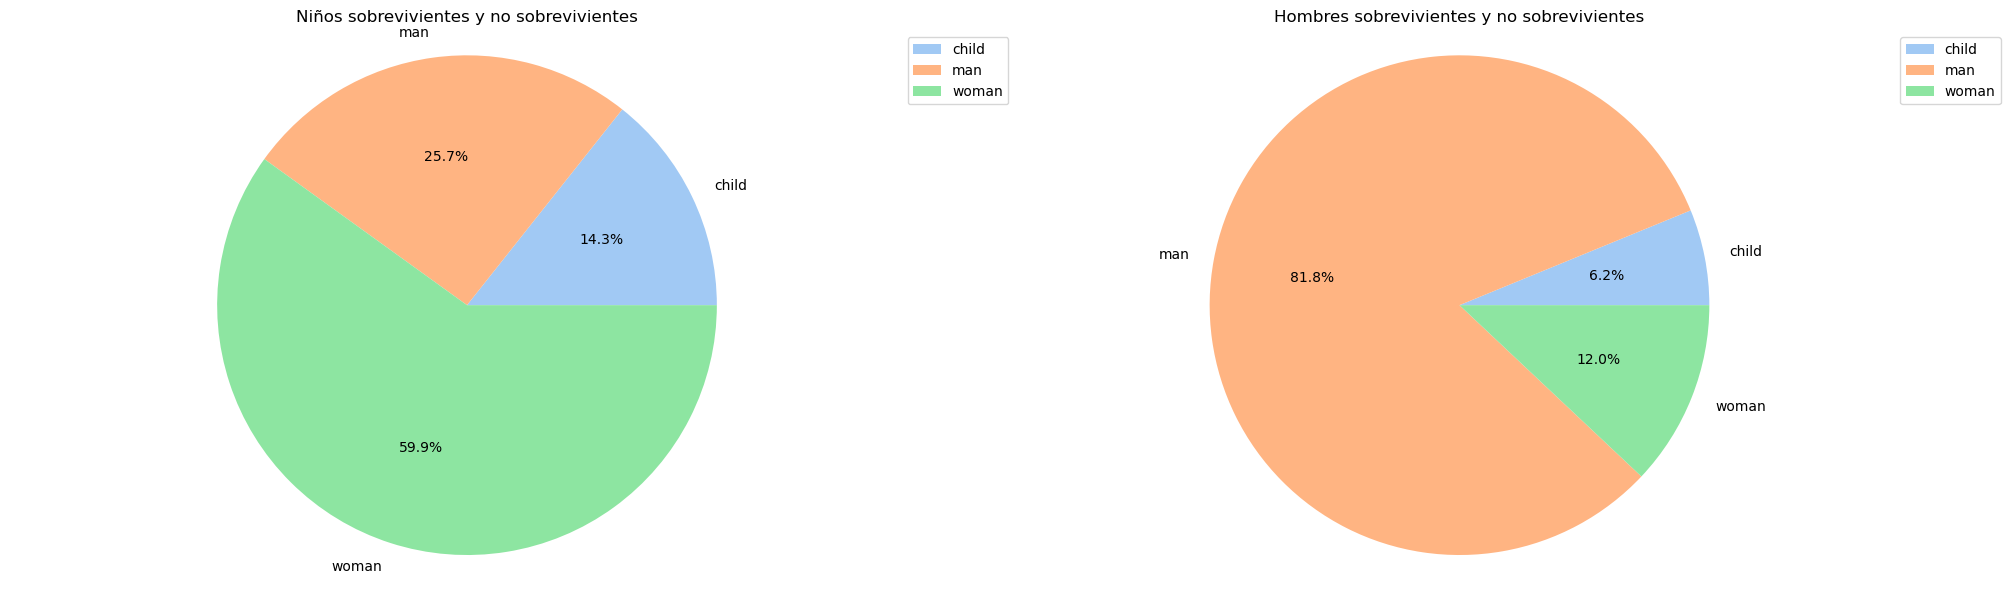

In [127]:
# GRAFICO DE TRES 
df4 = df1.copy()
whos = df4.groupby(['survived','who']).size().unstack()
print(whos)



plt.rcParams['figure.figsize']=(20,6)
plt.subplot(1,2,1)
plt.pie(whos.loc[1],
        labels=whos.columns,
        colors=sns.color_palette('pastel'),
        autopct='%1.1f%%')
plt.title('Niños sobrevivientes y no sobrevivientes')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.axis('equal')


plt.subplot(1,2,2)
plt.pie(whos.loc[0],
        labels=whos.columns,
        colors=sns.color_palette('pastel'),
        autopct='%1.1f%%')
plt.title('Hombres sobrevivientes y no sobrevivientes')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.axis('equal')



plt.tight_layout()
plt.show()

In [128]:
# GRAFICO DE BARERAS POR GENERO 
df5 = df1.copy()
surv = df2['survived'].value_counts()

print(surv)


survived
0    549
1    342
Name: count, dtype: int64


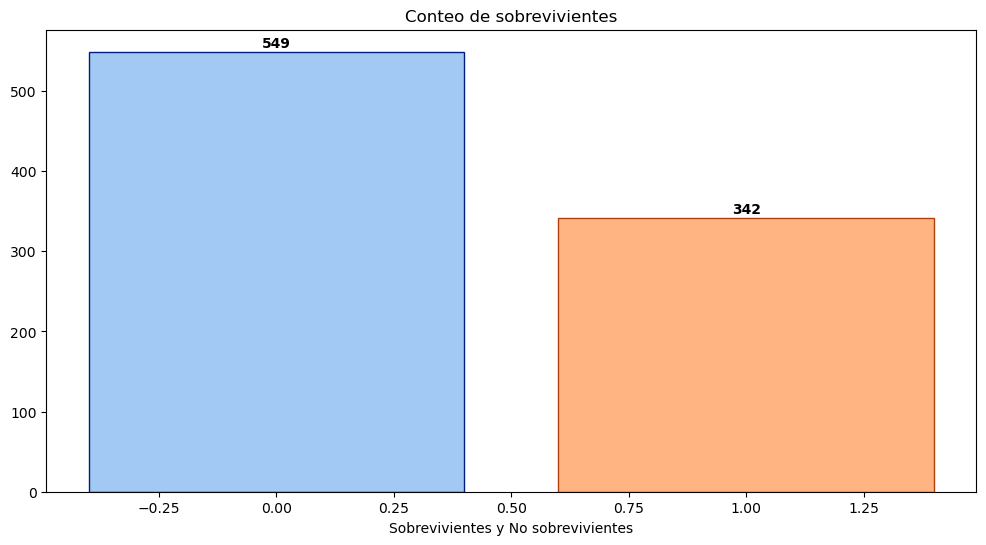

In [132]:
plt.rcParams['figure.figsize']=(12,6)
plt.bar(surv.index,surv.values,
        color=sns.color_palette('pastel'),
        edgecolor = sns.color_palette('dark'))
for i, v in enumerate(surv.values):
    plt.text(i, v + 5, str(v), ha='center', color='black', fontweight='bold')
plt.title('Conteo de sobrevivientes')
plt.xlabel('Sobrevivientes y No sobrevivientes')
# plt.ylabel('conteo')
plt.show()